# Searching for Be stars in binaries with compact objects
## Seeking relationships between parameters
### Caden Gobat, The George Washington University

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, astropy.units as u, seaborn as sns, sympy
from scipy import stats
from astroquery.vizier import Vizier
from astropy.table import Table as ap_table
from tools import hms_to_dec, dms_to_dec

pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'cmtt10'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 14
v = Vizier()
v.ROW_LIMIT = -1 # no row limit

In [2]:
all = pd.read_csv("catalogs/VizieR_all.tsv",header=181,delimiter=";").drop([0,1,2109],axis=0)

In [3]:
all["RA"] = [coord.split(",")[0].strip() for coord in all["_1"]]
all["DEC"] = [coord.split(",")[1].strip() for coord in all["_1"]]

BeSS = pd.read_csv("./catalogs/BeSS_catalog.csv")

combined = pd.merge(BeSS,all,on=["RA","DEC"],how="outer")

In [4]:
for i in range(1,2265):
    instances = len(combined[combined["#"]==i])
    if instances == 0:
        pass
    elif instances >= 2:
        dupeframe = combined[combined["#"]==i]#[["#","angDist"]]
        display(dupeframe)
        #df.drop(dupeframe[dupeframe["angDist"]>min(dupeframe["angDist"])].index, inplace=True)

,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
63,64,RX J0051.3-7250,Classical,00 51 18.70,-72 50 35.88,NaN,Be,NaN,0,"00 51 18.70,-72 50 35.88",012.8275821140195,-72.8430535458879,012.82758211402,-72.84305354589,4688960627670161280,,,,0.000,0.00e+00,19.0473,,,,302.94506417362,-44.28519319779,,,,,"00 51 18.70,-72 50 35.88",012.8280111522800,-72.8431620860500,012.82801115228,-72.84316208605,4688960627670161152,3552.788911297359846,"00 51 18.70,-72 50 35.88",,,,,,,,,,,,,,"00 51 18.70,-72 50 35.88",,,,,,,,,,,"00 51 18.70,-72 50 35.88",,,,,,,,,,,,,,,,,,"00 51 18.70,-72 50 35.88",,,,,,,,,,,,,,,,,NaN
64,64,RX J0051.3-7250,Classical,00 51 18.70,-72 50 35.88,NaN,Be,NaN,0,"00 51 18.70,-72 50 35.88",012.8280216690391,-72.8431533789692,012.82801115228,-72.84316208605,4688960627670161152,-0.8391,-0.721,-2.022,2.385,9.73e+01,17.6059,17.0979,16.9531,,302.94488727617,-44.28508474467,,,,,"00 51 18.70,-72 50 35.88",,,,,,,"00 51 18.70,-72 50 35.88",,,,,,,,,,,,,,"00 51 18.70,-72 50 35.88",,,,,,,,,,,"00 51 18.70,-72 50 35.88",,,,,,,,,,,,,,,,,,"00 51 18.70,-72 50 35.88",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
90,90,[MA93] 720,Classical,00 53 53.66,-72 22 01.40,15.75,B3IIIe,323.0,0,"00 53 53.66,-72 22 01.40",013.4735104917690,-72.3671001526279,013.47351435864,-72.36710440772,4689009109289381632,-0.0348,0.272,-0.988,0.630,3.27e+01,15.6938,15.5132,15.4784,,302.66997367152,-44.75989635800,9084.00,,,,"00 53 53.66,-72 22 01.40",013.4735143586400,-72.3671044077200,013.47351435864,-72.36710440772,4689009109289381632,4489.258850677790178,"00 53 53.66,-72 22 01.40",,,,,,,,,,,,,,"00 53 53.66,-72 22 01.40",,,,,,,,,,,"00 53 53.66,-72 22 01.40",,,,,,,,,,,,,,,,,,"00 53 53.66,-72 22 01.40",,,,,,,,,,,,,,,,,NaN
91,90,[MA93] 720,Classical,00 53 53.66,-72 22 01.40,15.75,B3IIIe,323.0,0,"00 53 53.66,-72 22 01.40",013.4728495302468,-72.3671933902254,013.47284953025,-72.36719339023,4689009109233866880,,,,1.235,3.08e+00,18.4947,,,,302.67025894687,-44.75981008713,,,,,"00 53 53.66,-72 22 01.40",,,,,,,"00 53 53.66,-72 22 01.40",,,,,,,,,,,,,,"00 53 53.66,-72 22 01.40",,,,,,,,,,,"00 53 53.66,-72 22 01.40",,,,,,,,,,,,,,,,,,"00 53 53.66,-72 22 01.40",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
95,94,Cl* NGC 330 ELS 065746,Classical,00 54 01.89,-72 24 45.57,17.42,B1Ve,362.0,0,"00 54 01.89,-72 24 45.57",013.5082468977977,-72.4127205637178,013.50824689780,-72.41272056372,4689005810699274752,,,,0.000,0.00e+00,19.3481,,,,302.65606901549,-44.71413947416,,,,,"00 54 01.89,-72 24 45.57",013.5077528087300,-72.4126926038100,013.50775280873,-72.41269260381,4689005810699274624,468.460404782572027,"00 54 01.89,-72 24 45.57",,,,,,,,,,,,,,"00 54 01.89,-72 24 45.57",,,,,,,,,,,"00 54 01.89,-72 24 45.57",,,,,,,,,,,,,,,,,,"00 54 01.89,-72 24 45.57",,,,,,,,,,,,,,,,,NaN
96,94,Cl* NGC 330 ELS 065746,Classical,00 54 01.89,-72 24 45.57,17.42,B1Ve,362.0,0,"00 54 01.89,-72 24 45.57",013.5077521113603,-72.4126778745457,013.50775280873,-72.41269260381,4689005810699274624,2.1293,0.049,-3.421,1.474,4.01e+01,17.3949,17.1667,17.0300,,302.65627852363,-44.71416954755,,,,,"00 54 01.89,-72 24 45.57",,,,,,,"00 54 01.89,-72 24 45.57",,,,,,,,,,,,,,"00 54 01.89,-72 24 45.57",,,,,,,,,,,"00 54 01.89,-72 24 45.57",,,,,,,,,,,,,,,,,,"00 54 01.89,-72 24 45.57",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
123,121,Cl* NGC 330 ELS 064832,Classical,00 54 54.58,-72 27 23.64,16.79,B3IIIe,300.0,0,"00 54 54.58,-72 27 23.64",013.7273067369302,-72.4566179893349,013.72732286751,-72.45661943015,4689005913779435776,-0.7632,1.129,-0.335,0.989,3.13e+01,16.8277,16.6361,16.4837,,302.56410247356,-44.66915132345,7230.00,,,,"00 54 54.58,-72 27 23.64",013.7273228675100,-72.4566194301500,013.72732286751,-72.45661943015,4689005913779435776,6194.165286574159836,"00 54 54.58,-72 27 23.64",,,,,,,,,,,,,,"00 54 54.58,-72 27 23.64",,,,,,,,,,,"00 54 54.58,-72 27 23.64",,,,,,,,,,,,,,,,,,"00 54 54.58,-72 27 23.64",,,,,,,,,,,,,,,,,NaN
124,121,Cl* NGC 330 ELS 064832,Classical,00 54 54.58,-72 27 23.64,16.79,B3IIIe,300.0,0,"00 54 54.58,-72 27 23.64",013.7267059293049,-72.4565616234293,013.72670592930,-72.45656162343,4689005913834325760,,,,0.666,1.26e+00,18.5267,,,,302.56436237195,-44.66921264333,,,,,"00 54 54.58,-72 27 23.64",,,,,,,"00 54 54.58,-72 27 23.64",,,,,,,,,,,,,,"00 54 54.58,-72 27 23.64",,,,,,,,,,,"00 54 54.58,-72 27 23.64",,,,,,,,,,,,,,,,,,"00 54 54.58,-72 27 23.64",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
140,137,Cl* NGC 330 KWBBE 1062,Classical,00 55 32.48,-72 27 52.00,17.29,B2IVe,370.0,0,"00 55 32.48,-72 27 52.00",013.8856885092114,-72.4645710107162,013.88570225314,-72.46457801686,4688994021020320768,-0.4720,0.962,-1.627,0.000,0.00e+00,18.4858,,,,302.49724021542,-44.66020730531,,,,,"00 55 32.48,-72 27 52.00",013.8857022531400,-72.4645780168600,013.88570225314,-72.46457801686,4688994021020320768,2921.523730154769964,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,,,,NaN
141,137,Cl* NGC 330 KWBBE 1062,Classical,00 55 32.48,-72 27 52.00,17.29,B2IVe,370.0,0,"00 55 32.48,-72 27 52.00",013.8851381871195,-72.4644501282922,013.88516918880,-72.46445352104,4688994025360393472,0.9963,2.169,-0.788,1.649,5.52e+01,17.4211,16.9958,17.0606,,302.49746203989,-44.66033536816,,,,,"00 55 32.48,-72 27 52.00",013.8851691888000,-72.4644535210400,013.88516918880,-72.46445352104,4688994025360393472,1001.134753775770037,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,,,,NaN
142,137,Cl* NGC 330 KWBBE 1062,Classical,00 55 32.48,-72 27 52.00,17.29,B2IVe,370.0,0,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,,,,,"00 55 32.48,-72 27 52.00",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
148,143,Cl* NGC 330 ELS 025052,Classical,00 55 39.81,-72 16 04.20,17.72,B5IVe,340.0,0,"00 55 39.81,-72 16 04.20",013.9152255607759,-72.2679924518929,013.91522556078,-72.26799245189,4689011342672045312,,,,0.000,0.00e+00,20.5323,,,,302.47834427279,-44.85653823780,,,,,"00 55 39.81,-72 16 04.20",,,,,,,"00 55 39.81,-72 16 04.20",,,,,,,,,,,,,,"00 55 39.81,-72 16 04.20",,,,,,,,,,,"00 55 39.81,-72 16 04.20",,,,,,,,,,,,,,,,,,"00 55 39.81,-72 16 04.20",,,,,,,,,,,,,,,,,NaN
149,143,Cl* NGC 330 ELS 025052,Classical,00 55 39.81,-72 16 04.20,17.72,B5IVe,340.0,0,"00 55 39.81,-72 16 04.20",013.9159626271908,-72.2679030869733,013.91596262719,-72.26790308697,4689011342616201600,,,,16.570,2.55e+03,17.8056,17.4433,17.4587,,302.47802476182,-44.85662238402,,,,,"00 55 39.81,-72 16 04.20",,,,,,,"00 55 39.81,-72 16 04.20",,,,,,,,,,,,,,"00 55 39.81,-72 16 04.20",,,,,,,,,,,"00 55 39.81,-72 16 04.20",,,,,,,,,,,,,,,,,,"00 55 39.81,-72 16 04.20",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
152,146,Cl* NGC 330 KWBBE 522,Classical,00 55 42.62,-72 23 58.20,16.04,B7IIe,89.0,0,"00 55 42.62,-72 23 58.20",013.9268793629286,-72.3995568671424,013.92687936293,-72.39955686714,4689006532309024896,,,,1.244,2.24e+00,19.1656,,,,302.47766945313,-44.72492716931,,,,,"00 55 42.62,-72 23 58.20",013.9275424315900,-72.3995521564400,013.92754243159,-72.39955215644,4689006532253528192,3943.573964771840110,"00 55 42.62,-72 23 58.20",,,,,,,,,,,,,,"00 55 42.62,-72 23 58.20",,,,,,,,,,,"00 55 42.62,-72 23 58.20",,,,,,,,,,,,,,,,,,"00 55 42.62,-72 23 58.20",,,,,,,,,,,,,,,,,NaN
153,146,Cl* NGC 330 KWBBE 522,Classical,00 55 42.62,-72 23 58.20,16.04,B7IIe,89.0,0,"00 55 42.62,-72 23 58.20",013.9275318045785,-72.3995503143159,013.92754243159,-72.39955215644,4689006532253528192,0.0728,0.746,-0.428,0.644,3.05e+01,15.9425,15.8380,15.6993,,302.47738718134,-44.72492719873,8730.00,,,,"00 55 42.62,-72 23 58.20",,,,,,,"00 55 42.62,-72 23 58.20",,,,,,,,,,,,,,"00 55 42.62,-72 23 58.20",,,,,,,,,,,"00 55 42.62,-72 23 58.20",,,,,,,,,,,,,,,,,,"00 55 42.62,-72 23 58.20",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
169,162,Cl* NGC 330 ARP I-204,Classical,00 56 03.10,-72 27 20.88,15.79,B0Ve,NaN,0,"00 56 03.10,-72 27 20.88",014.0127384988683,-72.4556985596716,014.01274732116,-72.45568044892,4688993711861245952,-0.0555,0.618,4.206,3.598,6.37e+02,16.6852,16.5870,15.5368,,302.44312563409,-44.66819117017,5095.63,,,,"00 56 03.10,-72 27 20.88",014.0127473211600,-72.4556804489200,014.01274732116,-72.45568044892,4688993711861245952,1913.400920324289928,"00 56 03.10,-72 27 20.88",,,,,,,,,,,,,,"00 56 03.10,-72 27 20.88",,,,,,,,,,,"00 56 03.10,-72 27 20.88",,,,,,,,,,,,,,,,,,"00 56 03.10,-72 27 20.88",,,,,,,,,,,,,,,,,NaN
170,162,Cl* NGC 330 ARP I-204,Classical,00 56 03.10,-72 27 20.88,15.79,B0Ve,NaN,0,"00 56 03.10,-72 27 20.88",014.0132126081608,-72.4559565647734,014.01321260816,-72.45595656477,4688993716063656704,,,,5.616,4.77e+00,20.5451,,,,302.44293826375,-44.66791160860,,,,,"00 56 03.10,-72 27 20.88",,,,,,,"00 56 03.10,-72 27 20.88",,,,,,,,,,,,,,"00 56 03.10,-72 27 20.88",,,,,,,,,,,"00 56 03.10,-72 27 20.88",,,,,,,,,,,,,,,,,,"00 56 03.10,-72 27 20.88",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
194,186,Cl* NGC 330 KWBBE 228,Classical,00 56 18.13,-72 27 13.50,15.54,B2IVe,315.0,0,"00 56 18.13,-72 27 13.50",014.0756007438184,-72.4537928558736,014.07560965860,-72.45379838093,4688993677501236736,0.0519,0.624,-1.283,0.284,7.42e+00,15.5532,15.4023,15.5081,,302.41641968268,-44.66958229060,9353.00,,,,"00 56 18.13,-72 27 13.50",014.0756096586000,-72.4537983809300,014.07560965860,-72.45379838093,4688993677501236736,5653.255483378159624,"00 56 18.13,-72 27 13.50",,,,,,,,,,,,,,"00 56 18.13,-72 27 13.50",,,,,,,,,,,"00 56 18.13,-72 27 13.50",,,,,,,,,,,,,,,,,,"00 56 18.13,-72 27 13.50",,,,,,,,,,,,,,,,,NaN
195,186,Cl* NGC 330 KWBBE 228,Classical,00 56 18.13,-72 27 13.50,15.54,B2IVe,315.0,0,"00 56 18.13,-72 27 13.50",014.0751480358999,-72.4539355336444,014.07514803590,-72.45393553364,4688993681762866176,,,,2.163,6.71e+00,18.9704,,,,302.41662042145,-44.66944888187,,,,,"00 56 18.13,-72 27 13.50",,,,,,,"00 56 18.13,-72 27 13.50",,,,,,,,,,,,,,"00 56 18.13,-72 27 13.50",,,,,,,,,,,"00 56 18.13,-72 27 13.50",,,,,,,,,,,,,,,,,,"00 56 18.13,-72 27 13.50",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
196,187,[MA93] 929,Classical,00 56 18.26,-72 17 46.80,16.39,B3IIIe,405.0,0,"00 56 18.26,-72 17 46.80",014.0763561520371,-72.2960891911139,014.07635454322,-72.29609421636,4689013885241700352,-0.0641,-0.114,-1.167,1.242,2.52e+00,19.1787,,,,302.41019451853,-44.82722463242,,,,,"00 56 18.26,-72 17 46.80",014.0763545432200,-72.2960942163600,014.07635454322,-72.29609421636,4689013885241700352,2043.983151563259980,"00 56 18.26,-72 17 46.80",,,,,,,,,,,,,,"00 56 18.26,-72 17 46.80",,,,,,,,,,,"00 56 18.26,-72 17 46.80",,,,,,,,,,,,,,,,,,"00 56 18.26,-72 17 46.80",,,,,,,,,,,,,,,,,NaN
197,187,[MA93] 929,Classical,00 56 18.26,-72 17 46.80,16.39,B3IIIe,405.0,0,"00 56 18.26,-72 17 46.80",014.0760953139018,-72.2964143564585,014.07610167851,-72.29641987631,4689013885295091200,-0.0124,0.450,-1.282,0.358,6.69e+00,16.1801,16.0791,15.9522,,302.41031513437,-44.82690113708,8932.67,,,,"00 56 18.26,-72 17 46.80",014.0761016785100,-72.2964198763100,014.07610167851,-72.29641987631,4689013885295091200,5105.344766720610096,"00 56 18.26,-72 17 46.80",,,,,,,,,,,,,,"00 56 18.26,-72 17 46.80",,,,,,,,,,,"00 56 18.26,-72 17 46.80",,,,,,,,,,,,,,,,,,"00 56 18.26,-72 17 46.80",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
204,194,Cl* NGC 330 KWBBE 882,Classical,00 56 21.39,-72 27 27.89,17.08,B1Ve,384.0,0,"00 56 21.39,-72 27 27.89",014.0887339779050,-72.4579120883710,014.08851817045,-72.45791146157,4688993681762958720,-1.9522,-15.107,0.146,2.157,1.00e+01,19.0720,,,,302.41110479523,-44.66536678149,,,,,"00 56 21.39,-72 27 27.89",014.0892352661700,-72.4577696161300,014.08923526617,-72.45776961613,4688993677522045312,4143.727640941249774,"00 56 21.39,-72 27 27.89",,,,,,,,,,,,,,"00 56 21.39,-72 27 27.89",,,,,,,,,,,"00 56 21.39,-72 27 27.89",,,,,,,,,,,,,,,,,,"00 56 21.39,-72 27 27.89",,,,,,,,,,,,,,,,,NaN
205,194,Cl* NGC 330 KWBBE 882,Classical,00 56 21.39,-72 27 27.89,17.08,B1Ve,384.0,0,"00 56 21.39,-72 27 27.89",014.0892156791585,-72.4577626648816,014.08923526617,-72.45776961613,4688993677522045312,0.0191,1.371,-1.614,0.556,8.29e+00,17.1087,16.6665,16.6747,,302.41079565425,-44.66550277289,,,,,"00 56 21.39,-72 27 27.89",014.0885181704500,-72.4579114615700,014.08851817045,-72.45791146157,4688993681762958720,2956.458198931059997,"00 56 21.39,-72 27 27.89",,,,,,,,,,,,,,"00 56 21.39,-72 27 27.89",,,,,,,,,,,"00 56 21.39,-72 27 27.89",,,,,,,,,,,,,,,,,,"00 56 21.39,-72 27 27.89",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
209,198,Cl* NGC 330 ELS 023931,Classical,00 56 24.64,-72 17 20.79,17.36,B2IVe,349.0,0,"00 56 24.64,-72 17 20.79",014.1034459004046,-72.2890642362074,014.10344590040,-72.28906423621,4689013988374292224,,,,0.536,3.96e-02,20.7045,,,,302.39831277889,-44.83403001262,,,,,"00 56 24.64,-72 17 20.79",014.1026493241500,-72.2891529438000,014.10264932415,-72.28915294380,4689013984022915968,3526.390302827720006,"00 56 24.64,-72 17 20.79",,,,,,,,,,,,,,"00 56 24.64,-72 17 20.79",,,,,,,,,,,"00 56 24.64,-72 17 20.79",,,,,,,,,,,,,,,,,,"00 56 24.64,-72 17 20.79",,,,,,,,,,,,,,,,,NaN
210,198,Cl* NGC 330 ELS 023931,Classical,00 56 24.64,-72 17 20.79,17.36,B2IVe,349.0,0,"00 56 24.64,-72 17 20.79",014.1026387217854,-72.2891463982312,014.10264932415,-72.28915294380,4689013984022915968,0.0430,0.749,-1.520,0.554,4.72e+00,17.4870,17.2848,17.2832,,302.39865777654,-44.83394793824,,,,,"00 56 24.64,-72 17 20.79",,,,,,,"00 56 24.64,-72 17 20.79",,,,,,,,,,,,,,"00 56 24.64,-72 17 20.79",,,,,,,,,,,"00 56 24.64,-72 17 20.79",,,,,,,,,,,,,,,,,,"00 56 24.64,-72 17 20.79",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
241,229,Cl* NGC 330 ELS 082202,Classical,00 57 30.31,-72 15 58.40,15.76,B5IIIe,265.0,0,"00 57 30.31,-72 15 58.40",014.3769404675612,-72.2660704760991,014.37694046756,-72.26607047610,4689013541644063360,,,,6.600,7.05e+02,17.3019,,,,302.27996635861,-44.85449511157,,,,,"00 57 30.31,-72 15 58.40",014.3764280980900,-72.2663156452300,014.37642809809,-72.26631564523,4689013541697570688,4602.876143477369624,"00 57 30.31,-72 15 58.40",,,,,,,,,,,,,,"00 57 30.31,-72 15 58.40",,,,,,,,,,,"00 57 30.31,-72 15 58.40",,,,,,,,,,,,,,,,,,"00 57 30.31,-72 15 58.40",,,,,,,,,,,,,,,,,NaN
242,229,Cl* NGC 330 ELS 082202,Classical,00 57 30.31,-72 15 58.40,15.76,B5IIIe,265.0,0,"00 57 30.31,-72 15 58.40",014.3763824372559,-72.2663096154695,014.37642809809,-72.26631564523,4689013541697570688,-1.0541,3.230,-1.400,1.868,3.31e+02,15.5171,14.9563,15.0842,,302.28019788375,-44.85425526563,6876.00,,,,"00 57 30.31,-72 15 58.40",,,,,,,"00 57 30.31,-72 15 58.40",,,,,,,,,,,,,,"00 57 30.31,-72 15 58.40",,,,,,,,,,,"00 57 30.31,-72 15 58.40",,,,,,,,,,,,,,,,,,"00 57 30.31,-72 15 58.40",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
252,239,Cl* NGC 346 KWBBE 377,Classical,00 58 47.50,-72 12 36.61,15.47,Be,NaN,0,"00 58 47.50,-72 12 36.61",014.6977987679667,-72.2102036123262,014.69781312412,-72.21020698973,4689015324143065984,-0.0642,1.019,-0.784,0.354,1.17e+01,15.6006,15.4674,15.5636,,302.13901641252,-44.90672051012,9122.67,,,,"00 58 47.50,-72 12 36.61",014.6978131241200,-72.2102069897300,014.69781312412,-72.21020698973,4689015324143065984,7126.183884803070214,"00 58 47.50,-72 12 36.61",,,,,,,,,,,,,,"00 58 47.50,-72 12 36.61",,,,,,,,,,,"00 58 47.50,-72 12 36.61",,,,,,,,,,,,,,,,,,"00 58 47.50,-72 12 36.61",,,,,,,,,,,,,,,,,NaN
253,239,Cl* NGC 346 KWBBE 377,Classical,00 58 47.50,-72 12 36.61,15.47,Be,NaN,0,"00 58 47.50,-72 12 36.61",014.6970400468280,-72.2101989831737,014.69704004683,-72.21019898317,4689015534562168192,,,,4.333,4.39e+00,19.5853,,,,302.13934917373,-44.90673802936,,,,,"00 58 47.50,-72 12 36.61",,,,,,,"00 58 47.50,-72 12 36.61",,,,,,,,,,,,,,"00 58 47.50,-72 12 36.61",,,,,,,,,,,"00 58 47.50,-72 12 36.61",,,,,,,,,,,,,,,,,,"00 58 47.50,-72 12 36.61",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
272,258,RX J0101.3-7211,Classical,01 01 20.81,-72 11 18.96,15.49,Be,NaN,0,"01 01 20.81,-72 11 18.96",015.3369532343347,-72.1887773652945,015.33695323433,-72.18877736529,4690505613271675776,,,,7.416,1.20e+01,20.1272,,,,301.86199462671,-44.91887988703,,,,,"01 01 20.81,-72 11 18.96",015.3361093430600,-72.1886067710400,015.33610934306,-72.18860677104,4690505613293360640,7108.137548481649901,"01 01 20.81,-72 11 18.96",15.336083058,-72.188594490,-4.49191e+01,3.01862e+02,J010120.6-721118,,,,,,,,,"01 01 20.81,-72 11 18.96",015.3371700,-72.1886600,301.86189,-44.91899,51334,0.287,0.511,2.121e-11,2.31e-11,5.143e-01,"01 01 20.81,-72 11 18.96",015.33617194,-72.18862000,015.336172,-72.188620,201231102010007,0.666565,0.450191,J010120.6-721119,1.75619e-15,7.56552e-15,2.70410e-14,1.08816e-13,9.94626e-15,5.36326e-13,1.03235e-13,0.167650,0.058280,"01 01 20.81,-72 11 18.96",,,,,,,,,,,,,,,,,NaN
273,258,RX J0101.3-7211,Classical,01 01 20.81,-72 11 18.96,15.49,Be,NaN,0,"01 01 20.81,-72 11 18.96",015.3360988225664,-72.1886017368220,015.33610934306,-72.18860677104,4690505613293360640,-0.0557,0.747,-1.169,0.317,8.29e+00,15.6497,15.4811,15.7544,,301.86234554068,-44.91906425125,8868.67,,,,"01 01 20.81,-72 11 18.96",,,,,,,"01 01 20.81,-72 11 18.96",,,,,,,,,,,,,,"01 01 20.81,-72 11 18.96",,,,,,,,,,,"01 01 20.81,-72 11 18.96",,,,,,,,,,,,,,,,,,"01 01 20.81,-72 11 18.96",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
347,332,BD+60 274,Classical,01 35 37.69,61 16 49.30,10.66,B3IIIe,NaN,0,"01 35 37.69,61 16 49.30",023.9068878738403,+61.2805095701118,023.90687653881,+61.28050691952,509978579873632384,0.9657,-1.265,-0.616,0.311,3.78e+01,11.2390,11.1613,10.6800,,128.21613141991,-1.13704742951,6038.67,,4.59,25.189,"01 35 37.69,61 16 49.30",023.9068765388100,+61.2805069195200,023.90687653881,+61.28050691952,509978579873632384,1021.946702895420003,"01 35 37.69,61 16 49.30",,,,,,,,,,,,,,"01 35 37.69,61 16 49.30",,,,,,,,,,,"01 35 37.69,61 16 49.30",,,,,,,,,,,,,,,,,,"01 35 37.69,61 16 49.30",,,,,,,,,,,,,,,,,NaN
348,332,BD+60 274,Classical,01 35 37.69,61 16 49.30,10.66,B3IIIe,NaN,0,"01 35 37.69,61 16 49.30",023.9072248017651,+61.2801577046769,023.90720776152,+61.28015698110,509978579881384832,0.2946,-1.902,-0.168,0.358,4.19e+01,11.3426,11.2810,10.8041,,128.21634798190,-1.13736509031,6629.00,,,,"01 35 37.69,61 16 49.30",023.9072077615200,+61.2801569811000,023.90720776152,+61.28015698110,509978579881384832,2902.099963862120148,"01 35 37.69,61 16 49.30",,,,,,,,,,,,,,"01 35 37.69,61 16 49.30",,,,,,,,,,,"01 35 37.69,61 16 49.30",,,,,,,,,,,,,,,,,,"01 35 37.69,61 16 49.30",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
479,463,IPHAS J020826.27+625745.9,Classical,02 08 26.27,62 57 45.90,NaN,A0,NaN,0,"02 08 26.27,62 57 45.90",032.1098396499852,+62.9628455920091,032.10982755779,+62.96284657051,514640131216426624,-0.2800,-1.277,0.227,0.873,1.32e+01,17.4769,,,,131.55382913520,+1.38727232956,,,,,"02 08 26.27,62 57 45.90",032.1098275577900,+62.9628465705100,032.10982755779,+62.96284657051,514640131216426624,5112.066899620739605,"02 08 26.27,62 57 45.90",,,,,,,,,,,,,,"02 08 26.27,62 57 45.90",,,,,,,,,,,"02 08 26.27,62 57 45.90",,,,,,,,,,,,,,,,,,"02 08 26.27,62 57 45.90",,,,,,,,,,,,,,,,,NaN
480,463,IPHAS J020826.27+625745.9,Classical,02 08 26.27,62 57 45.90,NaN,A0,NaN,0,"02 08 26.27,62 57 45.90",032.1094243826176,+62.9627465666852,032.10941293477,+62.96274819313,514640131223596544,0.2474,-1.209,0.378,0.327,2.42e+01,14.5104,15.0553,13.6996,,131.55367779184,+1.38712296608,4485.00,,,,"02 08 26.27,62 57 45.90",032.1094129347700,+62.9627481931300,032.10941293477,+62.96274819313,514640131223596544,3562.174023608240077,"02 08 26.27,62 57 45.90",,,,,,,,,,,,,,"02 08 26.27,62 57 45.90",,,,,,,,,,,"02 08 26.27,62 57 45.90",,,,,,,,,,,,,,,,,,"02 08 26.27,62 57 45.90",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
756,739,HD 32358,Classical,05 04 44.15,44 57 30.99,9.34,B6Ve,NaN,57,"05 04 44.15,44 57 30.99",076.1839780413692,+44.9585774578175,076.18398058226,+44.95859836815,205807067523449984,5.7101,0.418,4.857,1.632,6.94e+02,9.3846,9.2562,8.6854,,162.18849858597,+2.26197182509,5409.00,,2.32,4.157,"05 04 44.15,44 57 30.99",076.1839805822600,+44.9585983681500,076.18398058226,+44.95859836815,205807067523449984,177.323198094067010,"05 04 44.15,44 57 30.99",,,,,,,,,,,,,,"05 04 44.15,44 57 30.99",,,,,,,,,,,"05 04 44.15,44 57 30.99",,,,,,,,,,,,,,,,,,"05 04 44.15,44 57 30.99",,,,,,,,,,,,,,,,,NaN
757,739,HD 32358,Classical,05 04 44.15,44 57 30.99,9.34,B6Ve,NaN,57,"05 04 44.15,44 57 30.99",076.1840622683568,+44.9584348409558,076.18406226836,+44.95843484096,205807071819222784,,,,2.738,1.36e+03,9.8483,9.2389,8.7082,,162.18866385971,+2.26191882110,5095.63,,,,"05 04 44.15,44 57 30.99",,,,,,,"05 04 44.15,44 57 30.99",,,,,,,,,,,,,,"05 04 44.15,44 57 30.99",,,,,,,,,,,"05 04 44.15,44 57 30.99",,,,,,,,,,,,,,,,,,"05 04 44.15,44 57 30.99",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
771,753,[L72] LH 39-17,Classical,05 14 06.04,-69 32 27.89,15.23,B0.5Ve,NaN,0,"05 14 06.04,-69 32 27.89",078.5253172681214,-69.5410763450452,078.52534123417,-69.54107607746,4658209035461196032,-0.0236,1.946,0.062,0.251,5.44e+00,15.6178,15.4490,15.6800,,280.41323285635,-33.73865560428,8562.50,,,,"05 14 06.04,-69 32 27.89",078.5253412341700,-69.5410760774600,078.52534123417,-69.54107607746,4658209035461196032,6804.221472419279962,"05 14 06.04,-69 32 27.89",,,,,,,,,,,,,,"05 14 06.04,-69 32 27.89",,,,,,,,,,,"05 14 06.04,-69 32 27.89",,,,,,,,,,,,,,,,,,"05 14 06.04,-69 32 27.89",,,,,,,,,,,,,,,,,NaN
772,753,[L72] LH 39-17,Classical,05 14 06.04,-69 32 27.89,15.23,B0.5Ve,NaN,0,"05 14 06.04,-69 32 27.89",078.5246970388756,-69.5412443720366,078.52469703888,-69.54124437204,4658209039840488576,,,,5.664,1.85e+01,19.5514,,,,280.41349019089,-33.73883789657,,,,,"05 14 06.04,-69 32 27.89",,,,,,,"05 14 06.04,-69 32 27.89",,,,,,,,,,,,,,"05 14 06.04,-69 32 27.89",,,,,,,,,,,"05 14 06.04,-69 32 27.89",,,,,,,,,,,,,,,,,,"05 14 06.04,-69 32 27.89",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
832,813,Cl* NGC 2004 KWBBE 554,Classical,05 30 19.79,-67 17 05.02,16.74,B2.5Ve,47.0,0,"05 30 19.79,-67 17 05.02",082.5823623046541,-67.2848841738013,082.58237970009,-67.28488402466,4660179708211442048,-0.0069,1.560,0.035,0.810,2.13e+01,16.7894,16.4659,16.7241,,277.44739428206,-32.66444002762,9552.33,,,,"05 30 19.79,-67 17 05.02",082.5823797000900,-67.2848840246600,082.58237970009,-67.28488402466,4660179708211442048,4169.394984912019936,"05 30 19.79,-67 17 05.02",,,,,,,,,,,,,,"05 30 19.79,-67 17 05.02",,,,,,,,,,,"05 30 19.79,-67 17 05.02",,,,,,,,,,,,,,,,,,"05 30 19.79,-67 17 05.02",,,,,,,,,,,,,,,,,NaN
833,813,Cl* NGC 2004 KWBBE 554,Classical,05 30 19.79,-67 17 05.02,16.74,B2.5Ve,47.0,0,"05 30 19.79,-67 17 05.02",082.5826462816025,-67.2845117339426,082.58267172137,-67.28450663776,4660179742598048896,0.1548,2.282,1.184,0.633,5.31e+00,17.5666,,,,277.44693247848,-32.66437680967,,,,,"05 30 19.79,-67 17 05.02",082.5826717213700,-67.2845066377600,082.58267172137,-67.28450663776,4660179742598048896,2880.245039518929843,"05 30 19.79,-67 17 05.02",,,,,,,,,,,,,,"05 30 19.79,-67 17 05.02",,,,,,,,,,,"05 30 19.79,-67 17 05.02",,,,,,,,,,,,,,,,,,"05 30 19.79,-67 17 05.02",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
855,835,Cl* NGC 2004 KWBBE 374,Classical,05 30 47.80,-67 11 36.43,16.37,B2Ve,337.0,2,"05 30 47.80,-67 11 36.43",082.6986613626755,-67.1934566485745,082.69867727820,-67.19345503554,4660181769822771200,-0.1085,1.433,0.375,0.533,2.78e+00,17.5722,,,,277.33288825874,-32.63145523419,,,,,"05 30 47.80,-67 11 36.43",082.6993953960000,-67.1934724068200,082.69939539600,-67.19347240682,4660181769796320000,4424.348415669969654,"05 30 47.80,-67 11 36.43",,,,,,,,,,,,,,"05 30 47.80,-67 11 36.43",,,,,,,,,,,"05 30 47.80,-67 11 36.43",,,,,,,,,,,,,,,,,,"05 30 47.80,-67 11 36.43",,,,,,,,,,,,,,,,,NaN
856,835,Cl* NGC 2004 KWBBE 374,Classical,05 30 47.80,-67 11 36.43,16.37,B2Ve,337.0,2,"05 30 47.80,-67 11 36.43",082.6993845077113,-67.1934835660320,082.69939539600,-67.19347240682,4660181769796320000,-0.0086,0.980,2.592,0.601,1.24e+01,16.6560,16.1711,16.4667,,277.33286711713,-32.63117690421,9191.00,,,,"05 30 47.80,-67 11 36.43",082.6986772782000,-67.1934550355400,082.69867727820,-67.19345503554,4660181769822771200,3611.478935335960159,"05 30 47.80,-67 11 36.43",,,,,,,,,,,,,,"05 30 47.80,-67 11 36.43",,,,,,,,,,,"05 30 47.80,-67 11 36.43",,,,,,,,,,,,,,,,,,"05 30 47.80,-67 11 36.43",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
880,859,HD 37115,Classical,05 35 54.08,-05 37 42.33,7.16,B6Ve,NaN,78,"05 35 54.08,-05 37 42.33",083.9753581982657,-05.6286030502249,083.97538239878,-05.62863334869,3017342485409179392,6.5366,5.594,-7.037,2.481,7.54e+02,8.3809,7.0402,7.1257,,209.31141972700,-19.35274624004,5095.63,,,,"05 35 54.08,-05 37 42.33",083.9753823987800,-05.6286333486900,083.97538239878,-05.62863334869,3017342485409179392,158.113713047190004,"05 35 54.08,-05 37 42.33",,,,,,,,,,,,,,"05 35 54.08,-05 37 42.33",,,,,,,,,,,"05 35 54.08,-05 37 42.33",,,,,,,,,,,,,,,,,,"05 35 54.08,-05 37 42.33",,,,,,,,,,,,,,,,,NaN
881,859,HD 37115,Classical,05 35 54.08,-05 37 42.33,7.16,B6Ve,NaN,78,"05 35 54.08,-05 37 42.33",083.9753385031370,-05.6284011329734,083.97534388282,-05.62839766435,3017342485415388160,2.7771,1.243,0.806,0.454,5.34e+01,7.3143,7.0050,7.1770,,209.31117845488,-19.35267415247,9508.67,,,,"05 35 54.08,-05 37 42.33",083.9753438828200,-05.6283976643500,083.97534388282,-05.62839766435,3017342485415388160,357.846159408248013,"05 35 54.08,-05 37 42.33",,,,,,,,,,,,,,"05 35 54.08,-05 37 42.33",,,,,,,,,,,"05 35 54.08,-05 37 42.33",,,,,,,,,,,,,,,,,,"05 35 54.08,-05 37 42.33",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
896,874,[GC2000] Be13,Classical,05 38 15.70,-69 03 52.92,NaN,Be,NaN,0,"05 38 15.70,-69 03 52.92",084.5655126301932,-69.0649129572024,084.56552990585,-69.06491187119,4657686565599370240,-0.2855,1.434,0.252,1.221,1.97e+01,17.4373,,,,279.42844056321,-31.71542163235,,,,,"05 38 15.70,-69 03 52.92",084.5655299058500,-69.0649118711900,084.56552990585,-69.06491187119,4657686565599370240,3679.770724774290102,"05 38 15.70,-69 03 52.92",,,,,,,,,,,,,,"05 38 15.70,-69 03 52.92",,,,,,,,,,,"05 38 15.70,-69 03 52.92",,,,,,,,,,,,,,,,,,"05 38 15.70,-69 03 52.92",,,,,,,,,,,,,,,,,NaN
897,874,[GC2000] Be13,Classical,05 38 15.70,-69 03 52.92,NaN,Be,NaN,0,"05 38 15.70,-69 03 52.92",084.5650230728919,-69.0645337269108,084.56504116800,-69.06452927430,4657686565620133888,-0.1086,1.502,1.034,0.601,3.67e+00,17.6375,,,,279.42801744527,-31.71563917545,,,,,"05 38 15.70,-69 03 52.92",084.5650411680000,-69.0645292743000,084.56504116800,-69.06452927430,4657686565620133888,3875.091012919890090,"05 38 15.70,-69 03 52.92",,,,,,,,,,,,,,"05 38 15.70,-69 03 52.92",,,,,,,,,,,"05 38 15.70,-69 03 52.92",,,,,,,,,,,,,,,,,,"05 38 15.70,-69 03 52.92",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
900,877,[GC2000] Be19,Classical,05 38 16.30,-69 03 56.88,NaN,Be,NaN,0,"05 38 16.30,-69 03 56.88",084.5675596618803,-69.0656472170005,084.56759208599,-69.06563298589,4657686565620138752,1.6615,2.691,3.305,2.281,2.38e+01,18.1032,,,,279.42918285549,-31.71460665299,,,,,"05 38 16.30,-69 03 56.88",084.5675920859900,-69.0656329858900,084.56759208599,-69.06563298589,4657686565620138752,643.258957348179024,"05 38 16.30,-69 03 56.88",,,,,,,,,,,,,,"05 38 16.30,-69 03 56.88",,,,,,,,,,,"05 38 16.30,-69 03 56.88",,,,,,,,,,,,,,,,,,"05 38 16.30,-69 03 56.88",,,,,,,,,,,,,,,,,NaN
901,877,[GC2000] Be19,Classical,05 38 16.30,-69 03 56.88,NaN,Be,NaN,0,"05 38 16.30,-69 03 56.88",084.5676427315270,-69.0658672481608,084.56764273153,-69.06586724816,4657686565620138368,,,,1.239,4.63e+00,18.3280,,,,279.42945395656,-31.71456169865,,,,,"05 38 16.30,-69 03 56.88",,,,,,,"05 38 16.30,-69 03 56.88",,,,,,,,,,,,,,"05 38 16.30,-69 03 56.88",,,,,,,,,,,"05 38 16.30,-69 03 56.88",,,,,,,,,,,,,,,,,,"05 38 16.30,-69 03 56.88",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
904,880,[GC2000] Be7,Classical,05 38 16.80,-69 03 56.16,NaN,Be,NaN,0,"05 38 16.80,-69 03 56.16",084.5701225339993,-69.0658478603904,084.57015065342,-69.06584270559,4657686359461700480,-0.0998,2.333,1.197,0.568,1.52e+01,16.1776,15.4232,15.2393,,279.42930400786,-31.71367441773,5095.63,,,,"05 38 16.80,-69 03 56.16",084.5701506534200,-69.0658427055900,084.57015065342,-69.06584270559,4657686359461700480,5409.734921457419659,"05 38 16.80,-69 03 56.16",,,,,,,,,,,,,,"05 38 16.80,-69 03 56.16",,,,,,,,,,,"05 38 16.80,-69 03 56.16",,,,,,,,,,,,,,,,,,"05 38 16.80,-69 03 56.16",,,,,,,,,,,,,,,,,NaN
905,880,[GC2000] Be7,Classical,05 38 16.80,-69 03 56.16,NaN,Be,NaN,0,"05 38 16.80,-69 03 56.16",084.5701614549337,-69.0654241301733,084.57019732955,-69.06542542273,4657686359461700992,0.2215,2.977,-0.300,0.592,4.74e+00,17.0815,,,,279.42881448691,-31.71370589026,,,,,"05 38 16.80,-69 03 56.16",084.5701973295500,-69.0654254227300,084.57019732955,-69.06542542273,4657686359461700992,2593.519991492460122,"05 38 16.80,-69 03 56.16",,,,,,,,,,,,,,"05 38 16.80,-69 03 56.16",,,,,,,,,,,"05 38 16.80,-69 03 56.16",,,,,,,,,,,,,,,,,,"05 38 16.80,-69 03 56.16",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
910,885,[GC2000] Be16,Classical,05 38 17.59,-69 03 56.16,NaN,Be,NaN,0,"05 38 17.59,-69 03 56.16",084.5732094453981,-69.0658300789348,084.57320944540,-69.06583007893,4657686359440944512,,,,2.303,2.36e+01,17.7296,,,,279.42914139311,-31.71259024357,,,,,"05 38 17.59,-69 03 56.16",,,,,,,"05 38 17.59,-69 03 56.16",,,,,,,,,,,,,,"05 38 17.59,-69 03 56.16",,,,,,,,,,,"05 38 17.59,-69 03 56.16",,,,,,,,,,,,,,,,,,"05 38 17.59,-69 03 56.16",,,,,,,,,,,,,,,,,NaN
911,885,[GC2000] Be16,Classical,05 38 17.59,-69 03 56.16,NaN,Be,NaN,0,"05 38 17.59,-69 03 56.16",084.5736150988746,-69.0657935700353,084.57361509887,-69.06579357004,4657686359461710848,,,,10.114,1.04e+03,17.2473,,,,279.42907915634,-31.71245046937,,,,,"05 38 17.59,-69 03 56.16",,,,,,,"05 38 17.59,-69 03 56.16",,,,,,,,,,,,,,"05 38 17.59,-69 03 56.16",,,,,,,,,,,"05 38 17.59,-69 03 56.16",,,,,,,,,,,,,,,,,,"05 38 17.59,-69 03 56.16",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
915,889,[GC2000] Be3,Classical,05 38 18.79,-69 03 59.04,NaN,B4IIe,NaN,0,"05 38 18.79,-69 03 59.04",084.5785415391185,-69.0665697035035,084.57855940688,-69.06656737527,4657686359440941568,0.0802,1.483,0.541,0.346,6.18e+00,15.9036,15.1608,15.0319,,279.42974385344,-31.71060663583,5163.20,,,,"05 38 18.79,-69 03 59.04",084.5785594068800,-69.0665673752700,084.57855940688,-69.06656737527,4657686359440941568,4064.879947167809860,"05 38 18.79,-69 03 59.04",,,,,,,,,,,,,,"05 38 18.79,-69 03 59.04",,,,,,,,,,,"05 38 18.79,-69 03 59.04",,,,,,,,,,,,,,,,,,"05 38 18.79,-69 03 59.04",,,,,,,,,,,,,,,,,NaN
916,889,[GC2000] Be3,Classical,05 38 18.79,-69 03 59.04,NaN,B4IIe,NaN,0,"05 38 18.79,-69 03 59.04",084.5778827893377,-69.0664018265071,084.57790492038,-69.06639877174,4657686359440941952,0.0860,1.836,0.709,0.217,1.94e+00,16.1891,15.2212,15.0153,,279.42957858726,-31.71085831142,5095.63,,,,"05 38 18.79,-69 03 59.04",084.5779049203800,-69.0663987717400,084.57790492038,-69.06639877174,4657686359440941952,4478.994688454939933,"05 38 18.79,-69 03 59.04",,,,,,,,,,,,,,"05 38 18.79,-69 03 59.04",,,,,,,,,,,"05 38 18.79,-69 03 59.04",,,,,,,,,,,,,,,,,,"05 38 18.79,-69 03 59.04",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
919,892,V725 Tau,Classical,05 38 54.57,26 18 56.83,9.19,O9.7IIe,NaN,11,"05 38 54.57,26 18 56.83",084.7273955985278,+26.3157886709075,084.72739258157,+26.31577559955,3441207615229815040,0.4424,-0.628,-3.036,0.000,0.00e+00,8.6814,9.0783,8.1517,,181.44504932478,-2.64353678387,5740.55,,36.23,1284.186,"05 38 54.57,26 18 56.83",084.7273925815700,+26.3157755995500,084.72739258157,+26.31577559955,3441207615229815040,2126.258147211010055,"05 38 54.57,26 18 56.83",84.727451691,26.315549697,-2.64361e+00,1.81445e+02,J053854.5+261855X,,,,,,,,,"05 38 54.57,26 18 56.83",084.7274100,+26.3155900,181.44521,-2.64362,65552,0.600,0.450,9.635e-11,1.18e-10,1.187e+00,"05 38 54.57,26 18 56.83",084.72737000,+26.31586806,084.727370,+26.315868,206741801010001,0.755544,0.705999,J053854.5+261857,4.69067e-14,3.56820e-13,2.32523e-12,8.43564e-12,7.62406e-14,2.72642e-11,7.73780e-12,0.120172,-0.345815,"05 38 54.57,26 18 56.83",084.7275000,+26.3158333,181.40,-2.60,1A 0535+262,"T, P, C",V725 Tau,8.90,0.45,-0.54,8.368,8.272,8.157,3.00,111.000,104.0000,O9.7IIIe
920,892,V725 Tau,Classical,05 38 54.57,26 18 56.83,9.19,O9.7IIe,NaN,11,"05 38 54.57,26 18 56.83",,,,,,,,,,,,,,,,,,,,,"05 38 54.57,26 18 56.83",,,,,,,"05 38 54.57,26 18 56.83",84.727417210,26.315724870,-2.64355e+00,1.81445e+02,J053854.5+261856,3.1454580744830e-12,2.9003733465433e-12,2.3148970604343e-13,6.5225263551633e-14,6.9206381933871e-14,0.58339,0.77327,0.34603,"05 38 54.57,26 18 56.83",,,,,,,,,,,"05 38 54.57,26 18 56.83",,,,,,,,,,,,,,,,,,"05 38 54.57,26 18 56.83",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
1005,977,IY CMa,Classical,06 28 39.24,-32 22 16.60,5.74,B3Ve,275.0,4,"06 28 39.24,-32 22 16.60",097.1633931735788,-32.3713493874514,097.16339317358,-32.37134938745,2892312723240653312,,,,7.963,3.92e+03,5.8854,5.6053,5.8908,,240.47383964242,-18.58682582977,9057.67,,,,"06 28 39.24,-32 22 16.60",097.1635068946000,-32.3712418418600,097.16350689460,-32.37124184186,2892312723242963072,374.871525616136978,"06 28 39.24,-32 22 16.60",,,,,,,,,,,,,,"06 28 39.24,-32 22 16.60",,,,,,,,,,,"06 28 39.24,-32 22 16.60",,,,,,,,,,,,,,,,,,"06 28 39.24,-32 22 16.60",,,,,,,,,,,,,,,,,NaN
1006,977,IY CMa,Classical,06 28 39.24,-32 22 16.60,5.74,B3Ve,275.0,4,"06 28 39.24,-32 22 16.60",097.1635104981975,-32.3712784933304,097.16350689460,-32.37124184186,2892312723242963072,2.6459,-0.707,8.513,0.503,9.92e+01,5.8736,5.7050,5.9516,,240.47376974764,-18.58669775799,8598.67,,,,"06 28 39.24,-32 22 16.60",,,,,,,"06 28 39.24,-32 22 16.60",,,,,,,,,,,,,,"06 28 39.24,-32 22 16.60",,,,,,,,,,,"06 28 39.24,-32 22 16.60",,,,,,,,,,,,,,,,,,"06 28 39.24,-32 22 16.60",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
1471,1442,HD 97792,Classical,11 14 20.00,-56 02 51.23,7.97,B2.5Vnne,NaN,0,"11 14 20.00,-56 02 51.23",168.5833225977733,-56.0475590502073,168.58324419339,-56.04754655390,5340137593126721792,0.9956,-10.170,2.902,0.115,4.08e+00,7.8263,7.8264,7.8036,,289.61907714317,+4.29375869298,9489.00,0.3377,,,"11 14 20.00,-56 02 51.23",168.5832441933900,-56.0475465539000,168.58324419339,-56.04754655390,5340137593126721792,979.265631365474974,"11 14 20.00,-56 02 51.23",,,,,,,,,,,,,,"11 14 20.00,-56 02 51.23",,,,,,,,,,,"11 14 20.00,-56 02 51.23",,,,,,,,,,,,,,,,,,"11 14 20.00,-56 02 51.23",,,,,,,,,,,,,,,,,NaN
1472,1442,HD 97792,Classical,11 14 20.00,-56 02 51.23,7.97,B2.5Vnne,NaN,0,"11 14 20.00,-56 02 51.23",168.5837701033213,-56.0476344543351,168.58377010332,-56.04763445434,5340137593116095232,,,,3.991,2.86e+03,11.6617,,,,289.61938349150,+4.29378470030,,,,,"11 14 20.00,-56 02 51.23",,,,,,,"11 14 20.00,-56 02 51.23",,,,,,,,,,,,,,"11 14 20.00,-56 02 51.23",,,,,,,,,,,"11 14 20.00,-56 02 51.23",,,,,,,,,,,,,,,,,,"11 14 20.00,-56 02 51.23",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
1486,1456,HD 100199,Classical,11 31 06.91,-62 56 48.94,8.17,B0.5IIIne,NaN,0,"11 31 06.91,-62 56 48.94",172.7788015878973,-62.9469247647019,172.77874287445,-62.94691918507,5333660129603575808,0.7693,-6.202,1.296,0.277,2.20e+01,8.1256,8.1383,8.0919,,293.94489922248,-1.48519666481,9513.50,0.6047,,,"11 31 06.91,-62 56 48.94",172.7787428744500,-62.9469191850700,172.77874287445,-62.94691918507,5333660129603575808,1264.492130378449929,"11 31 06.91,-62 56 48.94",172.778934998,-62.946931875,-1.48518e+00,2.93945e+02,J113106.9-625648,2.6601391606460e-12,2.5638112912406e-12,1.3853484135923e-13,1.2921820840847e-14,0.0000000000000e+00,0.67208,0.93067,0.68582,"11 31 06.91,-62 56 48.94",172.7789800,-62.9470500,293.94504,-1.48529,53462,0.623,0.532,3.109e-11,3.33e-11,7.144e-01,"11 31 06.91,-62 56 48.94",,,,,,,,,,,,,,,,,,"11 31 06.91,-62 56 48.94",,,,,,,,,,,,,,,,,NaN
1487,1456,HD 100199,Classical,11 31 06.91,-62 56 48.94,8.17,B0.5IIIne,NaN,0,"11 31 06.91,-62 56 48.94",,,,,,,,,,,,,,,,,,,,,"11 31 06.91,-62 56 48.94",,,,,,,"11 31 06.91,-62 56 48.94",172.779145290,-62.946756012,-1.48499e+00,2.93945e+02,J113106.9-625648X,,,,,,,,,"11 31 06.91,-62 56 48.94",,,,,,,,,,,"11 31 06.91,-62 56 48.94",,,,,,,,,,,,,,,,,,"11 31 06.91,-62 56 48.94",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
2148,2117,lam Cyg,Classical,20 47 24.54,36 29 26.57,4.75,B5Ve,125.0,4712,"20 47 24.54,36 29 26.57",311.8521855243791,+36.4907089097249,311.85228500865,+36.49067635270,1870779903225039872,4.9885,18.576,-7.562,1.476,7.20e+02,4.8121,4.4847,4.6514,,78.08437169976,-4.33783802527,9466.25,,,,"20 47 24.54,36 29 26.57",311.8522850086500,+36.4906763527000,311.85228500865,+36.49067635270,1870779903225039872,200.994115395928986,"20 47 24.54,36 29 26.57",,,,,,,,,,,,,,"20 47 24.54,36 29 26.57",,,,,,,,,,,"20 47 24.54,36 29 26.57",,,,,,,,,,,,,,,,,,"20 47 24.54,36 29 26.57",,,,,,,,,,,,,,,,,NaN
2149,2117,lam Cyg,Classical,20 47 24.54,36 29 26.57,4.75,B5Ve,125.0,4712,"20 47 24.54,36 29 26.57",311.8522980246781,+36.4909318340977,311.85229802468,+36.49093183410,1870779903236215040,,,,12.275,3.77e+04,6.0969,4.4623,4.7322,,78.08457828298,-4.33768654008,5095.63,,,,"20 47 24.54,36 29 26.57",,,,,,,"20 47 24.54,36 29 26.57",,,,,,,,,,,,,,"20 47 24.54,36 29 26.57",,,,,,,,,,,"20 47 24.54,36 29 26.57",,,,,,,,,,,,,,,,,,"20 47 24.54,36 29 26.57",,,,,,,,,,,,,,,,,NaN


,#,Be star,Category,RA,DEC,V,Type_x,vsini,Nb of spectra in BeSS,_1,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,epsi,sepsi,Gmag,BPmag,RPmag,RV,GLON,GLAT,Teff,AG,Rad,Lum,_1.1,_RAJ2000.1,_DEJ2000.1,RA_ICRS.1,DE_ICRS.1,Source.1,rest,_1.2,_RAJ2000.2,_DEJ2000.2,GLON.1,GLAT.1,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,HRhm,HRhs,HRms,_1.3,_RAJ2000.3,_DEJ2000.3,GLON.2,GLAT.2,2SXPS,HR1,HR2,FPO0,FPU0,Gamma,_1.4,_RAJ2000.4,_DEJ2000.4,RA_ICRS.2,DE_ICRS.2,Source.2,HR1.1,HR2.1,4XMM,Flux1,Flux2,Flux3,Flux4,e_Flux5,Flux8,Flux9,HR3,HR4,_1.5,_RAJ2000.5,_DEJ2000.5,GLON.3,GLAT.3,Name,Type_y,Opt,Vmag,B-V,U-B,Jmag,Hmag,Kmag,FX,Porb,Ppulse,SpType
2184,2152,ALFIRK,Classical,21 28 39.60,70 33 38.57,3.216,B2IIIev,20.0,8073,"21 28 39.60,70 33 38.57",322.1648646080055,+70.5606865216334,322.16505570852,+70.56072069216,2272185759992826624,9.6671,14.772,7.936,5.200,1.12e+04,2.9434,3.2097,3.3939,,107.53922307264,+14.02609718987,6820.75,,16.32,519.186,"21 28 39.60,70 33 38.57",322.1650557085200,+70.5607206921600,322.16505570852,+70.56072069216,2272185759992826624,105.209243551086999,"21 28 39.60,70 33 38.57",,,,,,,,,,,,,,"21 28 39.60,70 33 38.57",,,,,,,,,,,"21 28 39.60,70 33 38.57",322.16475000,+70.56085694,322.164750,+70.560857,203004902010001,0.436732,-0.688414,J212839.5+703339,3.42458e-13,6.86159e-13,1.31721e-13,1.51540e-14,7.51517e-16,1.17748e-12,1.03045e-12,-0.916904,-0.976378,"21 28 39.60,70 33 38.57",,,,,,,,,,,,,,,,,NaN
2185,2152,ALFIRK,Classical,21 28 39.60,70 33 38.57,3.216,B2IIIev,20.0,8073,"21 28 39.60,70 33 38.57",322.1647417680077,+70.5609661530022,322.16474176801,+70.56096615300,2272185759992826752,,,,3.845,2.39e+03,8.9529,,,,107.53932680311,+14.02634425138,,,,,"21 28 39.60,70 33 38.57",,,,,,,"21 28 39.60,70 33 38.57",,,,,,,,,,,,,,"21 28 39.60,70 33 38.57",,,,,,,,,,,"21 28 39.60,70 33 38.57",,,,,,,,,,,,,,,,,,"21 28 39.60,70 33 38.57",,,,,,,,,,,,,,,,,NaN


In [5]:
files = ["./catalogs/BeSS_"+name+".csv" for name in ["catalog","Gaia_1as","GaiaDist_1as","Simbad_1as","Chandra_1as","Swift_1as","XMM_2as","HMXBs_1as"]]
xmatches = [pd.read_csv(filename) for filename in files]

for df in xmatches:
    for i in range(1,2265):
        instances = len(df[df["#"]==i])
        if instances == 0:
            pass
        elif instances >= 2:
            dupeframe = df[df["#"]==i][["#","angDist"]]
            df.drop(dupeframe[dupeframe["angDist"]>min(dupeframe["angDist"])].index, inplace=True)
    if "angDist" in df.columns:
        df.drop(["angDist"],axis=1,inplace=True)

master = xmatches[0]
for df in xmatches[1:]:
    master = pd.merge(master,df,on=list(xmatches[0].columns),how="left")
master = pd.merge(master,pd.read_csv("./catalogs/Gaia_epsi_Be.csv"), on="#", how="left")
master.drop([733,805,894,1419,1422,1461],axis=0,inplace=True)

In [6]:
for i in master.index:
    if master.loc[i,"main_type"] in ["Ae*","Be*","Em*","Candidate_Be*"]:
        master.loc[i,"Class"] = "Em"
    elif master.loc[i,"main_type"] in ["*","Star","IR","SG*","PM*","Candidate_RGB*","BlueSG*"]:
        master.loc[i,"Class"] = "Star"
    elif master.loc[i,"main_type"] in ["EB*",'EB*Algol','EB*WUMa','EB*betLyr',"SB*","**","multiple_object"]:
        master.loc[i,"Class"] = "Binary"
    elif master.loc[i,"main_type"] in ["Pe*","WR*","Pec*"]:
        master.loc[i,"Class"] = "Peculiar/WR"
    elif master.loc[i,"main_type"] in ["Y*?", "Y*O","Candidate_YSO","YSO"]:
        master.loc[i,"Class"] = "YSO"
    elif master.loc[i,"main_type"] in ["post-AGB*","*inNeb","HII","Cloud"]:
        master.loc[i,"Class"] = "Nebular"
    elif master.loc[i,"main_type"] in ["Eruptive*","Orion_V*","V*","PulsV*bCep","PulsV*","RotV*alf2CVn"]:
        master.loc[i,"Class"] = "Variable"
    elif master.loc[i,"main_type"] in ["HXB","HMXB"]:
        master.loc[i,"Class"] = "HMXB"
    elif pd.isna(master.loc[i,"main_type"]):
        master.loc[i,"Class"] = "Unknown"
    else:
        master.loc[i,"Class"] = "Other"

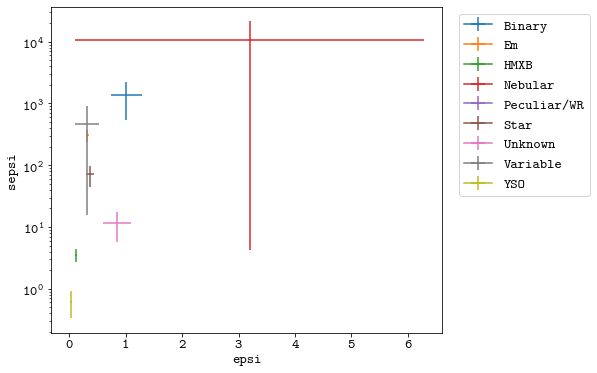

In [23]:
fig = plt.figure(figsize=(7,6))
for key,frame in master.groupby("Class"):
    plt.errorbar(np.mean(frame["epsi"].dropna()),np.mean(frame["sepsi"].dropna()),
                 xerr=stats.sem(frame["epsi"].dropna()),yerr=stats.sem(frame["sepsi"].dropna()),
                 label=key)
plt.yscale("log")
plt.ylabel("sepsi")
plt.xlabel("epsi")
plt.legend(loc="upper left", bbox_to_anchor=(1.025,1))
plt.show()
#stats.ks_2samp(master[master["Class"]=="Star"]["epsi"], master[master["Class"]=="Em"]["epsi"])
fig.savefig("epsi_sepsi_byclass.png",dpi=300,bbox_inches="tight")

c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  wa

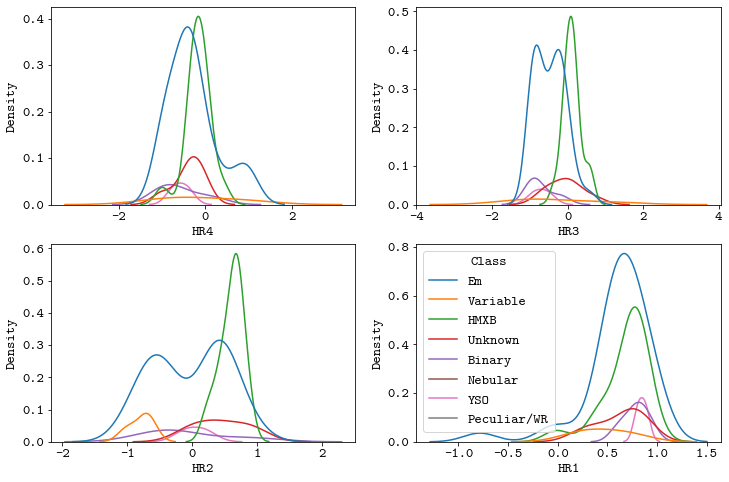

In [8]:
fig,axs = plt.subplots(figsize=(12,8), ncols=2,nrows=2)

sns.kdeplot(data=master[master["Class"]!="Star"], x="HR4", hue="Class", ax=axs[0,0], legend=False)
sns.kdeplot(data=master[master["Class"]!="Star"], x="HR3", hue="Class", ax=axs[0,1], legend=False)
sns.kdeplot(data=master[master["Class"]!="Star"], x="HR2", hue="Class", ax=axs[1,0], legend=False)
sns.kdeplot(data=master[master["Class"]!="Star"], x="HR1", hue="Class", ax=axs[1,1], legend=True)
plt.show()

This particular catalog pulled from CDS xmatch does not contain XMM flux data besides the broadband value, `Flux8`. However, it does have the four hardness ratios (given by $\text{HR}_{AB}=\frac{F_A-F_B}{F_A+F_B}$, where $A$ is the harder of two adjacent bands). This gives rise to the nonlinear system
$$ \begin{cases} F_1+F_2+F_3+F_4+F_5&=F_8 \\ \frac{F_2-F_1}{F_2+F_1}&=\text{HR}_1 \\ \frac{F_3-F_2}{F_3+F_2}&=\text{HR}_2 \\ \frac{F_4-F_3}{F_4+F_3}&=\text{HR}_3 \\ \frac{F_5-F_4}{F_5+F_4}&=\text{HR}_4 \end{cases} $$ which usually has a valid solution for the five flux values. Here I use `sympy` to solve for these fluxes where possible.

In [9]:
bandnames = ["Flux"+num for num in "12345"]
for i in master[~master["HR3"].isna()].index:
    HR1 = master.loc[i,"HR1"]
    HR2 = master.loc[i,"HR2"]
    HR3 = master.loc[i,"HR3"]
    HR4 = master.loc[i,"HR4"]
    F8 = master.loc[i,"Flux8"]
    
    F1 = sympy.var("F_1")
    F2 = sympy.var("F_2")
    F3 = sympy.var("F_3")
    F4 = sympy.var("F_4")
    F5 = sympy.var("F_5")

    system = [F1+F2+F3+F4+F5-F8,
             (F2-F1)/(F2+F1)-HR1,
             (F3-F2)/(F3+F2)-HR2,
             (F4-F3)/(F4+F3)-HR3,
             (F5-F4)/(F5+F4)-HR4]
    vars_ = [F1,F2,F3,F4,F5]
    try:
        solution = list(list(sympy.nonlinsolve(system, vars_))[0])
        master.loc[i,"Flux1"] = float(solution[0])
        master.loc[i,"Flux2"] = float(solution[1])
        master.loc[i,"Flux3"] = float(solution[2])
        master.loc[i,"Flux4"] = float(solution[3])
        master.loc[i,"Flux5"] = float(solution[4])
        #print(i)
    except:
        print(i, sympy.nonlinsolve(system, vars_))
        pass

91 EmptySet
116 EmptySet
535 EmptySet
687 EmptySet
704 EmptySet
772 EmptySet
1048 EmptySet
1145 EmptySet
1514 EmptySet
1596 FiniteSet((1.432387e-15 - 0.138182385425466*F_5, 9.567613e-15 - 0.922987703161013*F_5, 0, 0.061170088586479*F_5, F_5))
1714 EmptySet
1817 EmptySet
1896 EmptySet
1898 EmptySet
1908 EmptySet
2064 EmptySet
2078 EmptySet
2111 EmptySet
2157 EmptySet
2230 EmptySet


c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


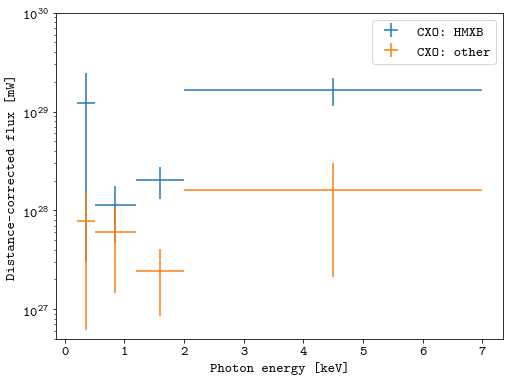

In [24]:
xmm_bands = dict(zip(list("1234589"),[(0.2,0.5),(0.5,1.0),(1.0,2.0),(2.0,4.5),(4.5,12.0),(0.2,12.0),(0.5,4.5)]))

HMXBs_XMM = master[(master["Class"]=="HMXB") & (~master["Flux8"].isna())]
other_XMM = master[(master["Class"]!="HMXB") & (~master["Flux8"].isna())]

for band in "12345":
    HMXBs_XMM.loc[:,"Lum"+band] = 4*np.pi*HMXBs_XMM.loc[:,"Flux"+band]*(HMXBs_XMM.loc[:,"rest"]*30856780000000000)**2
    other_XMM.loc[:,"Lum"+band] = 4*np.pi*other_XMM.loc[:,"Flux"+band]*(other_XMM.loc[:,"rest"]*30856780000000000)**2

chandra_bands = {"b":(0.5,7), "h":(2,7), "m":(1.2,2), "s":(0.5,1.2), "u":(0.2,0.5)}

HMXBs_CXO = master[(master["Class"]=="HMXB") & (~master["Fluxb"].isna())]
other_CXO = master[(master["Class"]!="HMXB") & (~master["Fluxb"].isna())]

for band in "usmh":
    HMXBs_CXO.loc[:,"Lum"+band] = 4*np.pi*HMXBs_CXO.loc[:,"Flux"+band]*(HMXBs_CXO.loc[:,"rest"]*30856780000000000)**2
    other_CXO.loc[:,"Lum"+band] = 4*np.pi*other_CXO.loc[:,"Flux"+band]*(other_CXO.loc[:,"rest"]*30856780000000000)**2
    
    
fig,ax = plt.subplots(figsize=(8,6))
# ax.errorbar([np.mean(xmm_bands[band]) for band in "12345"],
#             [np.mean(HMXBs_XMM["Lum"+band]) for band in "12345"],
#             xerr=[(xmm_bands[band][1]-xmm_bands[band][0])/2 for band in "12345"],
#             yerr=[stats.sem(HMXBs_XMM["Lum"+band].dropna()) for band in "12345"],
#             linestyle="",label="XMM: HMXB")
# ax.errorbar([np.mean(xmm_bands[band]) for band in "12345"],
#             [np.mean(other_XMM["Lum"+band]) for band in "12345"],
#             xerr=[(xmm_bands[band][1]-xmm_bands[band][0])/2 for band in "12345"],
#             yerr=[stats.sem(other_XMM["Lum"+band].dropna()) for band in "12345"],
#             linestyle="",label="XMM: other")
plt.errorbar([np.mean(chandra_bands[band]) for band in "usmh"],[np.mean(HMXBs_CXO["Lum"+band]) for band in "usmh"],
             xerr=[(chandra_bands[band][1]-chandra_bands[band][0])/2 for band in "usmh"],
             yerr=[stats.sem(HMXBs_CXO["Lum"+band].dropna()) for band in "usmh"],linestyle="",label="CXO: HMXB")
plt.errorbar([np.mean(chandra_bands[band]) for band in "usmh"],[np.mean(other_CXO["Lum"+band]) for band in "usmh"],
             xerr=[(chandra_bands[band][1]-chandra_bands[band][0])/2 for band in "usmh"],
             yerr=[stats.sem(other_CXO["Lum"+band].dropna()) for band in "usmh"],linestyle="",label="CXO: other")
ax.set_yscale("log")
ax.set_ylim(5e26,1e30)
ax.set_xlabel("Photon energy [keV]")
ax.set_ylabel("Distance-corrected flux [mW]")
ax.legend()
plt.show()
fig.savefig("./plots/hmxb_spectrum.png",dpi=300,bbox_inches="tight")

In [11]:
master.to_csv("./catalogs/master.csv",index=False)

In [12]:
for band in "usmh":
    master.loc[:,"Lum"+band] = 4*np.pi*master.loc[:,"Flux"+band]*(master.loc[:,"rest"]*30856780000000000)**2

In [13]:
print(len(HMXBs_CXO),len(other_CXO),len(HMXBs_XMM),len(other_XMM))

20 35 18 51


In [14]:
xray = master[(~master["4XMM"].isna()) | (~master["2CXO"].isna()) | (~master["2SXPS"].isna())]

In [15]:
for i in xray.index:
    cats = ["Gaia","2CXO","4XMM","2SXPS"]
    if pd.isna(xray.loc[i,"source_id"]):
        cats.remove("Gaia")
    if pd.isna(xray.loc[i,"2CXO"]):
        cats.remove("2CXO")
    if pd.isna(xray.loc[i,"4XMM"]):
        cats.remove("4XMM")
    if pd.isna(xray.loc[i,"2SXPS"]):
        cats.remove("2SXPS")
    xray.loc[i,"Catalogs"] = str(cats)[1:-1].replace("'","")

c:\users\caden gobat\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [16]:
#print(list(xray.columns))
print(xray[["#","Be star","RA","DEC","Class","Gmag","epsi","rest","Catalogs"]].to_latex(index=False))

\begin{tabular}{rllllrrrl}
\toprule
    \# &                 Be star &           RA &           DEC &     Class &       Gmag &   epsi &          rest &                 Catalogs \\
\midrule
   52 &         RX J0049.7-7323 &  00 49 41.99 &  -73 23 14.71 &      HMXB &  14.825013 &  0.074 &  10961.523170 &         Gaia, 2CXO, 4XMM \\
   60 &                  DZ Tuc &  00 50 44.69 &  -73 16 05.16 &      HMXB &  15.356619 &  0.119 &   9042.696195 &  Gaia, 2CXO, 4XMM, 2SXPS \\
   66 &                  SMC 25 &  00 51 52.01 &  -73 10 33.96 &      HMXB &  14.351566 &  0.207 &  12460.374970 &         Gaia, 2CXO, 4XMM \\
   67 &          2E 0050.1-7247 &  00 51 53.17 &  -72 31 48.50 &      HMXB &  14.812205 &  0.319 &   7030.854573 &               Gaia, 2CXO \\
   69 &               X SMC X-3 &  00 52 05.77 &  -72 26 03.19 &   Unknown &        NaN &    NaN &           NaN &               2CXO, 4XMM \\
   71 &          2E 0050.4-7335 &  00 52 13.99 &  -73 19 18.84 &      HMXB &  14.600782 &  0.169

In [17]:
master[master["4XMM"].notna() & master["2CXO"].notna()]

,#,Be star,Category,RA,DEC,V,Type,vsini,Nb of spectra in BeSS,_RAJ2000_Gaia,_DEJ2000_Gaia,source_id,parallax,pmra_x,pmdec_x,Gflux,Gmag,BPflux,BPmag,RPflux,RPmag,radial_velocity,teff_val,a_g_val,radius_val,lum_val,gaia_id,_RAJ2000_gaia2dis,_DEJ2000_gaia2dis,rest,main_id,_RAJ2000_Simbad,_DEJ2000_Simbad,main_type,other_types,radvel,redshift,sp_type,plx,pmra_y,pmdec_y,B,V.1,R,J,H,K,u,g,r,i,z,_RAJ2000_CXO,_DEJ2000_CXO,2CXO,Fluxb,Fluxh,Fluxm,Fluxs,Fluxu,Fluxw,S/N,NHGal,HRhm,HRhs,HRms,_RAJ2000_XRT,_DEJ2000_XRT,2SXPS,CR0,HR_1,HR_2,PcstS0,FPO0,FPU0,_RAJ2000_XMM,_DEJ2000_XMM,Source,4XMM,Flux8,HR1,HR2,HR3,HR4,VarFlag,_RAJ2000_HMXB,_DEJ2000_HMXB,HMXB_Name,Type.1,Vmag,Porb,SpType,epsi,sepsi,Class,Flux1,Flux2,Flux3,Flux4,Flux5,Lumu,Lums,Lumm,Lumh
51,52,RX J0049.7-7323,Classical,00 49 41.99,-73 23 14.71,14.980,B2Ve,NaN,0,12.425031,-73.387410,4.685927e+18,-0.0403,0.623,-1.152,22148.3,14.825013,1.631400e+04,14.819985,1.130850e+04,14.628409,NaN,9281.25,NaN,NaN,NaN,4.685927e+18,12.425040,-73.387415,10961.523170,LIN 139,12.425031,-73.387410,HMXB,Em*|HXB|IR |X |* |Psr|Be?|Psr|HXB|Em*|HXB,NaN,NaN,O9.5-B0.5III-V,NaN,0.62,-1.15,15.000,14.980,NaN,14.551,14.482,14.303,NaN,NaN,NaN,NaN,NaN,12.425003,-73.387415,J004942.0-732314,3.639864e-14,2.823236e-14,6.315251e-15,1.991827e-15,0.000000e+00,NaN,58.367,4.58,0.30106,0.54841,0.29482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.426001,-73.387425,2.011000e+14,J004942.2-732314,7.610000e-13,0.781369,0.672771,0.141023,-0.024442,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074,0.853,HMXB,4.791783e-15,3.904265e-14,1.995832e-13,2.651166e-13,2.524658e-13,0.000000e+00,2.863548e+27,9.079115e+27,4.058823e+28
59,60,DZ Tuc,Classical,00 50 44.69,-73 16 05.16,15.440,Be,NaN,0,12.686282,-73.268176,4.685929e+18,-0.0418,0.755,-1.126,13573.7,15.356619,1.056320e+04,15.291896,6.298320e+03,15.263858,NaN,9572.50,NaN,NaN,NaN,4.685929e+18,12.686293,-73.268181,9042.696195,V* DZ Tuc,12.686282,-73.268176,HMXB,IR |V* |HXB|X |Em*|Psr|* |Psr|HXB|Em*|HXB,NaN,NaN,B0-B0.5V,NaN,0.76,-1.13,15.370,15.440,NaN,15.296,15.160,15.010,NaN,NaN,NaN,NaN,NaN,12.686215,-73.268134,J005044.6-731605,4.052841e-13,3.564553e-13,3.766034e-14,1.595900e-14,2.641786e-14,NaN,66.336,4.83,0.52467,0.64085,0.17489,12.68685,-73.26817,24913.0,0.0180,0.594,0.461,4.710000e-02,1.507000e-12,1.640000e-12,12.686311,-73.268182,2.011000e+14,J005044.7-731605,9.690000e-13,0.850844,0.628668,0.120864,-0.073112,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119,1.610,HMXB,4.914828e-15,6.098702e-14,2.674900e-13,3.410393e-13,2.945688e-13,2.584667e+28,1.561395e+28,3.684607e+28,3.487483e+29
65,66,SMC 25,Classical,00 51 52.01,-73 10 33.96,14.450,Be,NaN,0,12.966770,-73.176151,4.685938e+18,-0.1357,0.725,-1.064,34254.7,14.351566,2.655240e+04,14.291129,1.536340e+04,14.295699,NaN,9522.75,NaN,NaN,NaN,4.685938e+18,12.966780,-73.176155,12460.374970,LIN 193,12.966770,-73.176151,HMXB,Em*|HXB|X |* |IR |SNR|Psr|Be*|Be?|Psr|HXB|Em...,NaN,NaN,O9.5-B0V,NaN,0.73,-1.06,14.380,14.450,14.24,14.430,14.760,14.500,NaN,NaN,NaN,NaN,NaN,12.966979,-73.176218,J005152.0-731034,5.698938e-13,4.396309e-13,6.843061e-14,7.165196e-14,1.033156e-12,NaN,50.777,5.03,0.35228,0.19613,-0.16740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.966676,-73.176081,2.011000e+14,J005152.0-731033,1.890000e-12,0.664199,0.297753,-0.034882,-0.193246,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207,8.320,HMXB,6.421972e-14,3.182671e-13,5.881578e-13,5.485086e-13,3.708468e-13,1.919284e+30,1.331071e+29,1.271229e+29,8.166980e+29
68,69,X SMC X-3,Classical,00 52 05.77,-72 26 03.19,14.910,O9IVe,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.023399,-72.434343,J005205.6-722603,5.829137e-15,3.983013e-15,6.938505e-16,1.317153e-15,0.000000e+00,NaN,38.810,7.15,0.29357,-0.25359,-0.49969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.023690,-72.434312,2.050098e+14,J005205.6-722603,1.290000e-12,0.662555,0.442941,-0.007716,-0.290036,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,3.3794

In [4]:
excel = pd.read_excel("BeSS_xray_classifications.xlsx")

In [7]:
excel.to_html("BeSS_html_export.html")